#**Gülşah Uğur**#

**HW 2**

In [67]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


#for quick viz
import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import random

# **Soru 1**# 
**One hot encoding modelin görmediği veriye nasıl uygulanır?**




**One Hot Encoding**

One-Hot Encoding, kategorik değişkenlerin ikili vektörler olarak temsil edilmesini sağlar.Bu kategorik değerler ilk olarak tamsayı değerlere eşlenir. Her bir tamsayı değeri daha sonra tamamı 0 olan bir ikili vektör olarak temsil edilir.
Aşağıdaki durumlarda One-Hot Encoding uygularız:
- Kategorik özellik sıralı değildir
- Kategorik özelliklerin sayısı daha azdır, bu nedenle One-Hot Encoding etkili bir şekilde uygulanabilir.

Verimizi modele sokabilmek için train-test ve validation olmak üzere üç bölüme ayırırız. Burada önemli olan verimizi train-test kısmında hangi aşamalardan geçirdiysek, validation kısmının da aynı aşamalardan geçmiş olması gerekiyor. Burada yaşadığımız en önemli sorunlardan biri One-Hot-Encoding işlemi train-test ve daha sonra validation kısmına uygulandıktan sonra tahminleme de hata almamız. Bunun ana sebebi train-test verisi üzerinde yaptığımız One-Hot-Encoding işlemi sonucunda ortaya çıkan kolonların sayısı ile validation verisi üzerinde yaptığımız One-Hot-Encoder işlemi sonucunda ortaya çıkan kolon sayısının eşit olmamasından kaynaklı modelin validation kısmında hata vermesi. Bu sorunun çözümüne ilişkin; modelin görmediği verisi için *OneHotEncoder*'ın ***handle_unknown*** parametresini ***ignore*** olarak ayarlayarak dönüşüm sırasında farklı olarak bilinmeyen bir kategoriyle karşılaşırsa o kategori bu parametre ile yok sayılabilir.

In [ ]:
 from sklearn.preprocessing import OneHotEncoder
 enc = OneHotEncoder(handle_unknown='ignore')
 X = [['Male', 1], ['Female', 3], ['Female', 2]]
 enc.fit(X)
 enc.categories_
 enc.transform([['Female', 1], ['Male', 4]]).toarray()

# **Soru 2**# 
**Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)**

**Label Encoding**

Label Encoding’de, her bir veri için alfabetik sıralamaya göre benzersiz bir tam sayı atanır. Örneğin cinsiyet değişkeninde eşsiz iki değer vardır: Female ve Male. F alfabetik olarak daha önde olduğu için Female 0, Male 1 değerini alır. Eğitim değişkenine ait veriler Ordinal Kategoriktir. Yani aralarında hiyerarşik bir sıra vardır.
Aşağıdaki durumlarda Label Encoding uygularız:
- Kategorik özellik sıralıdır
- Tek etkin kodlama yüksek bellek tüketimine yol açabileceğinden kategori sayısı oldukça fazladır.

In [99]:
from sklearn.preprocessing import LabelEncoder
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
labelencoder = LabelEncoder()
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


# **Soru 3**# 

**Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?**

**Dengesiz Veri Kümesi Nedir?**

Sınıflandırma yaparken, sınıfların eşit dağılmadığı, yani her sınıf için yaklaşık olarak aynı sayıda verinin olmadığı veri kümesidir.Dengesiz veri kümeleriyle karşılaştığımız durumlarda birçok makine öğrenmesi algoritması, sınıflardaki eşit olmayan dağılımı dikkate almayarak güvenilir sonuçlar vermeyebiliyor. Bu nedenden ötürü dengesiz veri kümeleriyle çalışırken dikkat etmemiz gereken noktalar ön plana çıkabiliyor;
- Dengesiz veri kümelerini, eğitim veri kümesi ve test veri kümesi olarak ikiye ayırırken, verilerin dengesizlik oranında, eğitim ve test kümelerine eşit dağılması gerekir. Yani her iki kümede sınıfların oranının aynı olması, modelin performansının istikrarlı olması açısından önemli. Dolayısıyla, veri kümesini eğitim ve test veri kümelerine ayırırken, train_test_split() fonksiyonundaki “stratify” parametresini dikkate almak gerekiyor.
- Makine öğrenmesi algoritmalarını eğitmek için kullandığımız scikit-learn kütüphanesinin içindeki birçok sınıflandırıcı "class_weight" parametresine sahip.Dengesiz bir veri kümesi, “class_weight” parametresi yardımıyla azınlık sınıfına atanan ağırlığı dengesizlik oranında arttırarak, algoritmanın azınlık verisini yanlış sınıflandırmasından kaynaklanan hata oranını arttırabilir. Dolayısıyla, modeli oluştururken genel hata oranını (overall error rate) azaltmaya çalışan algoritma bu dengesizliği, yani azınlık sınıfı dikkate alacak ve performansı artacaktır.
- Penalized Sınıflandırma yöntemleri (penalized-SVM and penalized-LDA, logistik regresyon vs.) modele, algoritmaları eğitirken, yanlış sınıflandırılan azınlık sınıfı verileri için fazladan cost yüklediği için, modelin azınlık sınıfına verdiği ağırlığı arttırıyor.

# **Soru 4**# 
**Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?**

**Validation Veri Seti**

Validation bölümü train veri seti içinden seçilir. Train veri seti üzerinde doğru model seçimi yapılarak algoritma belirlenir. Validation bölümünde ise uygulanan model iyileştirilmeye çalışılır. Bunun için hiper parametrik (hyperparameter tuning) uygulamalar denenerek en optimum katsayılar/ağırlıklar bulunmaya çalışılır. Özellikle çok büyük veri setleri üzerinde sürekli Train datası üzerinden çalışılamayacağı için küçük bir bölüm alınarak validation olarak tanımlanır.

# **Soru 5**# 
**predict_proba metoduyla oran nasıl hesaplanır ve threshold nasıl değiştirilir?**

Oluşturduğunuz modelleri eğittikten sonra sonuçları elde etmek için kullanabileceğiniz iki farklı fonksiyon tipi var.
- *predict*: Regresyon, sınıflandırma, kümeleme gibi yöntemler kullanarak yapacağımız çalışmalarda tahmin edilen etiket bilgisini predict fonksiyonuyla elde edebiliriz. Sınıflandırma problemlerinde gözlemlerin sınıflara ait olma olasılıklarını elde etmek istiyorsanız *predict_proba* fonksiyonunu kullanmanız gerekiyor.

`y_pred = dt.predict(X_test)`

Eğer etiketleri değil de olasılıkları öğrenmek istiyorsak predict_proba fonksiyonunu kullanmamız gerekiyor. Sonuçlar her etikete ait olma yüzdesini içeriyor.

`y_pred_proba = dt.predict_proba(X_test)`

In [ ]:
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)
y_pred = (rfc.predict_proba(X_test)[:,1] >= 0.4).astype(bool) 
# Normalde threshold değerimiz default olarak 0.5 alınıyorken, 0.4 olarak değiştirdik.
score = rfc.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))

# **Soru 6**# 
**Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df=pd.read_csv('/content/drive/MyDrive/auto_insurance_csv.csv')
df = df.drop(['_c39','Unnamed: 0'], axis = 1)
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")
df['police_report_available'] = df.police_report_available.fillna("MISSING")
df['policy_csl'] = df.policy_csl.fillna("MISSING")
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)
df['umbrella_limit'] = df.umbrella_limit.astype(str)
umbrealla = df['umbrella_limit'].unique()
for umb in umbrealla:
  if (umb != '0.0') & (umb != '9999'):
    df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')
    
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']
df1 = df[required_columns]

In [37]:
df1.incident_date.count()

1000

**TRAIN-TEST VE VALIDATION KISIMLARININ AYRILMASI**

In [38]:
# Verimiz normal dağılım gösterdiği için ayırma yöntemini istediğim şekilde yapabilirim. Burada ki kodda veriler sıraladıktan sonra en büyük 200 değer validation olarak tutulacak.
df1_val = df1.sort_values(by='incident_date',ascending=False).head(200)
df1_ttdata = df1.sort_values(by='incident_date',ascending=False).tail(800)

In [39]:
# Gereksiz kolonların temizlenmesi
df1_val = df1_val.drop(["incident_date"],axis=1)
df1_ttdata = df1_ttdata.drop(["incident_date"],axis=1)

In [40]:
df1_val = df1_val.drop(["incident_location"],axis=1)
df1_ttdata = df1_ttdata.drop(["incident_location"],axis=1)


In [41]:
# Kategorik Değişkenler
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df1_ttdata[col] = df1_ttdata[col].astype('object')

columns_to_encode = []
for col in df1_ttdata.columns:
  if df1_ttdata[col].dtype == 'object':
    columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'location_check',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [44]:
columns_to_encode= []
for col in df1_ttdata.columns:
  if df1_ttdata[col].dtype == 'object':
    columns_to_encode.append(col)

In [45]:
df1_ttdata_dummy = pd.get_dummies(df1_ttdata, columns = columns_to_encode)
columns_dummy = []
for i in df1_ttdata_dummy.columns:
    columns_dummy.append(i)

df1_dummy = df1_ttdata_dummy.iloc[:,:11]
clmn_dummy= columns_dummy[11:]

In [59]:
#One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
enc_fit = ohe.fit(df1_ttdata[columns_to_encode])
enc_fit_arr=enc_fit.fit_transform(df1_ttdata[columns_to_encode]).toarray()
enc_fit_df=pd.DataFrame(enc_fit_arr, columns=clmn_dummy)
df1_dummy.reset_index(drop=True, inplace=True)
df1_ttdata_ohe = pd.concat([df1_dummy,enc_fit_df], axis=1)
df1_ttdata_ohe.head(14)

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,claim_day_of_policy,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,policy_csl_MISSING,umbrella_limit_0.0,umbrella_limit_9999,umbrella_limit_other,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,location_check_False,location_check_True,age_group_15-20,age_group_21-25,age_group_26-30,age_group_31-35,age_group_36-40,age_group_41-45,age_group_46-50,age_group_51-55,age_group_56-60,age_group_61-65,age_group_9999,months_as_customer_groups_0-50,months_as_customer_groups_101-150,months_as_customer_groups_151-200,months_as_customer_groups_201-250,months_as_customer_groups_251-300,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,446755,0,-46200,9,1,2,3,6560,2003,0,4427,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,475891,0,0,6,1,1,3,6000,2000,0,8921,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,603948,47200,-69700,12,3,2,3,36300,2013,0,205,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,462525,26500,0,23,3,0,3,55200,1998,1,1980,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,471366,0,-31700,0,1,2,1,48290,1995,0,7692,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,604328,0,-47400,7,1,0,1,3190,2015,0,8231,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,438546,0,-54600,13,1,1,2,72120,2009,0,3483,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [60]:
cols = df1_ttdata_ohe.columns
num_cols = df1_ttdata_ohe._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [61]:
# feature ve target seçimi

target = 'fraud_reported'

X = df1_ttdata_ohe.drop(columns=target, axis=1)
y = df1_ttdata_ohe[target]


In [62]:
#StandartScaler işlemiyle ölçeklendirme yapılması
sc = StandardScaler()
X = sc.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



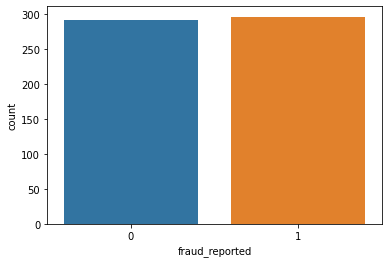

In [64]:
# SMOTE
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)
chck = pd.DataFrame()
chck['fraud_reported'] = y_train

sns.countplot(chck['fraud_reported'])


93.25396825396825

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       128
           1       0.92      0.94      0.93       124

    accuracy                           0.93       252
   macro avg       0.93      0.93      0.93       252
weighted avg       0.93      0.93      0.93       252



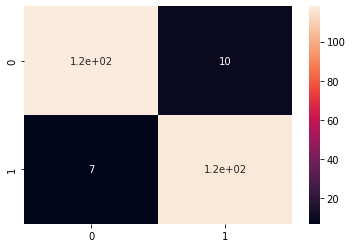

In [65]:
# Random Forest Modelling
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [68]:
# HYPERPARAMETER OPTIMIZATION
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [300, 650, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [69]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

92.85714285714286

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       128
           1       0.91      0.95      0.93       124

    accuracy                           0.93       252
   macro avg       0.93      0.93      0.93       252
weighted avg       0.93      0.93      0.93       252



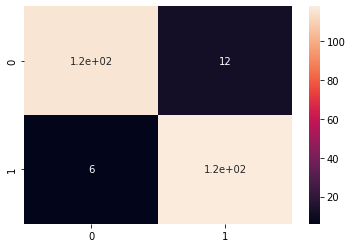

In [70]:
# Optimize edilen parametreler sonrası Random Forest
rf2 = RandomForestClassifier(n_estimators=300,min_samples_split=2,min_samples_leaf=2,max_features='auto'
                            ,max_depth=5,bootstrap='False')
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

**VALIDATION SETİ**

In [71]:
# Kategorik Değişkenler
categorical_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in categorical_cols:
  df1_val[col] = df1_val[col].astype('object')

In [73]:
columns_to_encode = []
for col in df1_val.columns:
  if df1_val[col].dtype == 'object':
    columns_to_encode.append(col)

In [74]:
#One-Hot Encoding
df1_val_ohe = pd.DataFrame(enc_fit.transform(df1_val[columns_to_encode]).toarray(), columns=clmn_dummy)
columns_num = columns_dummy[:11]
df1_val_numerical = pd.DataFrame(df1_val, columns=columns_num)
df1_val_numerical.reset_index(drop=True, inplace=True)
df1_val_ohe = pd.concat([df1_val_numerical, df1_val_ohe], axis=1)

In [78]:
# feature ve target seçimi
target = 'fraud_reported'
X_val = df1_val_ohe.drop(columns=target, axis=1)
y_val = df1_val_ohe[target]

In [79]:
#StandartScaler işlemiyle ölçeklendirme yapılması
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [83]:
# SMOTE
oversample = SMOTE(random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify=y_over, test_size = 0.3, random_state = 1)

chck = pd.DataFrame()
chck['fraud_reported'] = y_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



90.7258064516129

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       124
           1       0.91      0.90      0.91       124

    accuracy                           0.91       248
   macro avg       0.91      0.91      0.91       248
weighted avg       0.91      0.91      0.91       248



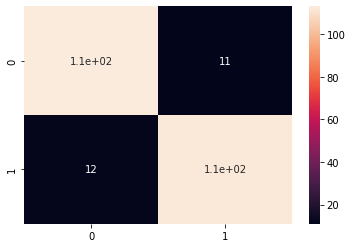

In [86]:
# Validation seti ile Random Forest
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [88]:
# HYPERPARAMETER OPTIMIZATION
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 9)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [100, 164, 228, 292, 357, 421, 485, 550, 614, 678, 742, 807, 871, 935, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 8, 11, 14, 17, 20, 23, 26, 30, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [89]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 614}

91.93548387096774

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       124
           1       0.92      0.92      0.92       124

    accuracy                           0.92       248
   macro avg       0.92      0.92      0.92       248
weighted avg       0.92      0.92      0.92       248



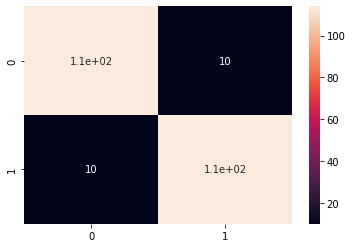

In [90]:
# Validation seti ile Optimize edilen parametreler sonrası Random Forest
rf2 = RandomForestClassifier(n_estimators=807,min_samples_split=2,min_samples_leaf=1,max_features='auto'
                            ,max_depth=26,bootstrap='True')
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

91.53225806451613

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       124
           1       0.87      0.98      0.92       124

    accuracy                           0.92       248
   macro avg       0.92      0.92      0.92       248
weighted avg       0.92      0.92      0.92       248



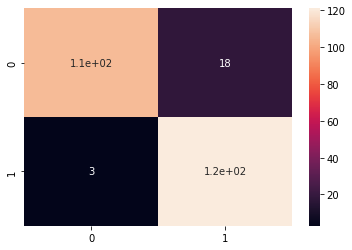

In [98]:
# THRESHOLD değer değiştirme
rf2 = RandomForestClassifier(n_estimators=807,min_samples_split=2,min_samples_leaf=1,max_features='auto'
                            ,max_depth=26,bootstrap='True')
rf2.fit(X_train, y_train)
preds = (rf2.predict_proba(X_test)[:,1] >= 0.3).astype(bool) 
score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)
